# Importing Necessary Libraries

In [208]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import copy
import matplotlib.pyplot as plt

In [209]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Loading the data

In [210]:
data = pd.read_csv('Dataset/TC2/train_TC2.csv')

In [211]:
data

,velocity_data_x,velocity_data_y,velocity_data_z
0,-0.134012,0.466469,-0.051024
1,-0.202646,0.543844,-0.040844
2,-0.202646,0.543844,-0.040844
3,-0.267686,0.621683,-0.031170
4,-0.299013,0.660611,-0.026600
...,...,...,...
2943,-1.211667,0.883520,-0.000159
2944,-1.211675,0.883522,-0.000159
2945,-1.211683,0.883522,-0.000159
2946,-1.211691,0.883519,-0.000159


In [212]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df_max_scaled = data.copy()
columns_to_scale = ['velocity_data_x', 'velocity_data_y', 'velocity_data_z']

scaler = MinMaxScaler()
for column in columns_to_scale:
    df_max_scaled[column] = scaler.fit_transform(np.array(df_max_scaled[column]).reshape(-1, 1) )
    
df_max_scaled

,velocity_data_x,velocity_data_y,velocity_data_z
0,0.987465,0.140303,0.000000
1,0.934934,0.193936,0.117364
2,0.934934,0.193936,0.117364
3,0.885153,0.247892,0.228894
4,0.861175,0.274875,0.281580
...,...,...,...
2943,0.162641,0.429388,0.586414
2944,0.162635,0.429389,0.586414
2945,0.162629,0.429389,0.586414
2946,0.162623,0.429387,0.586414


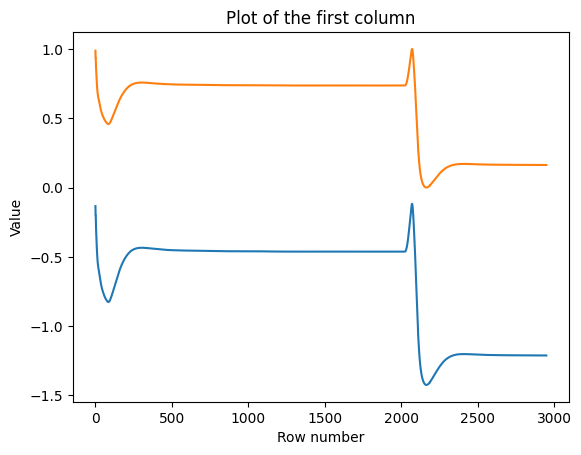

In [213]:
plt.plot(data['velocity_data_x'])
plt.plot(df_max_scaled['velocity_data_x'])

plt.xlabel('Row number')
plt.ylabel('Value')

plt.title('Plot of the first column')

plt.show()

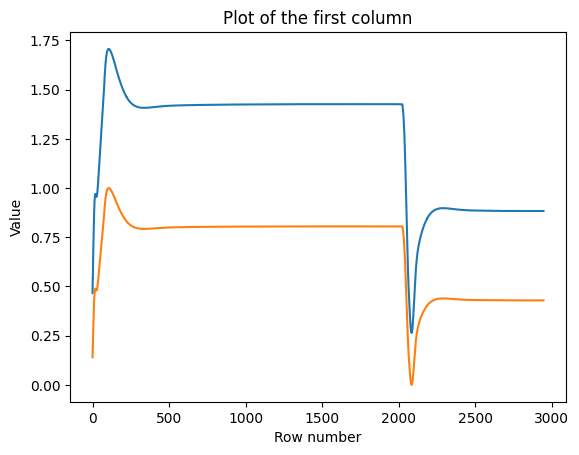

In [214]:
plt.plot(data['velocity_data_y'])
plt.plot(df_max_scaled['velocity_data_y'])

plt.xlabel('Row number')
plt.ylabel('Value')


plt.title('Plot of the first column')
plt.show()

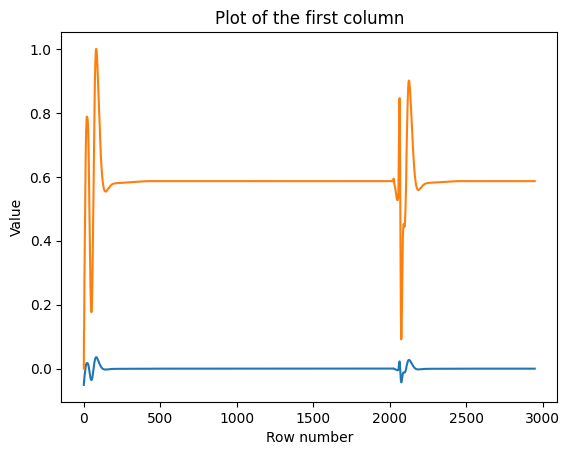

In [215]:
plt.plot(data['velocity_data_z'])
plt.plot(df_max_scaled['velocity_data_z'])

plt.xlabel('Row number')
plt.ylabel('Value')

plt.title('Plot of the first column')

plt.show()

In [216]:
#df_max_scaled.to_csv('df_max_scaled.csv', index=False)

In [217]:
sequence_size = 4
sequences = []

for i in range(len(data) - sequence_size + 1):
    sequence = data.iloc[i:i + sequence_size]
    sequences.append(sequence)

sequences_df = pd.concat(sequences, ignore_index=True)

sequences_df

,velocity_data_x,velocity_data_y,velocity_data_z
0,-0.134012,0.466469,-0.051024
1,-0.202646,0.543844,-0.040844
2,-0.202646,0.543844,-0.040844
3,-0.267686,0.621683,-0.031170
4,-0.202646,0.543844,-0.040844
...,...,...,...
11775,-1.211691,0.883519,-0.000159
11776,-1.211675,0.883522,-0.000159
11777,-1.211683,0.883522,-0.000159
11778,-1.211691,0.883519,-0.000159


In [218]:
x_train = sequences_df.values.tolist()
x_train

[[-0.134012, 0.466469, -0.051024],
 [-0.202646, 0.543844, -0.040844],
 [-0.202646, 0.543844, -0.040844],
 [-0.267686, 0.621683, -0.03117],
 [-0.202646, 0.543844, -0.040844],
 [-0.202646, 0.543844, -0.040844],
 [-0.267686, 0.621683, -0.03117],
 [-0.299013, 0.660611, -0.0266],
 [-0.202646, 0.543844, -0.040844],
 [-0.267686, 0.621683, -0.03117],
 [-0.299013, 0.660611, -0.0266],
 [-0.329513, 0.699309, -0.022177],
 [-0.267686, 0.621683, -0.03117],
 [-0.299013, 0.660611, -0.0266],
 [-0.329513, 0.699309, -0.022177],
 [-0.359074, 0.737451, -0.0179],
 [-0.299013, 0.660611, -0.0266],
 [-0.329513, 0.699309, -0.022177],
 [-0.359074, 0.737451, -0.0179],
 [-0.387509, 0.774519, -0.013663],
 [-0.329513, 0.699309, -0.022177],
 [-0.359074, 0.737451, -0.0179],
 [-0.387509, 0.774519, -0.013663],
 [-0.414533, 0.809782, -0.009355],
 [-0.359074, 0.737451, -0.0179],
 [-0.387509, 0.774519, -0.013663],
 [-0.414533, 0.809782, -0.009355],
 [-0.439797, 0.842406, -0.005043],
 [-0.387509, 0.774519, -0.013663],
 [-0.

In [219]:
input_size = 3
dropout = 0.1
num_layers=1
hidden_size=64
num_epochs=50
learning_rate=0.01


class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Determine device
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, bias=True, batch_first=True, dropout=dropout, bidirectional=True).to(self.device)  # Move LSTM to device
        self.fc_1 = nn.Linear(hidden_size * 2, 128).to(self.device)  # Move Linear layers to device
        self.relu1 = nn.ReLU()
        self.fc_2 = nn.Linear(128, input_size).to(self.device)
        self._init_weights()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, self.hidden_size).to(self.device)  # Move initial states to device
        c0 = torch.zeros(self.num_layers * 2, self.hidden_size).to(self.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc_1(out)
        out = self.relu1(out)
        out = self.fc_2(out)

        return out

    def _init_weights(self):
        for layer in [self.lstm, self.fc_1, self.fc_2]:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                nn.init.zeros_(layer.bias)
            elif isinstance(layer, nn.LSTM):
                for name, param in layer.named_parameters():
                    if 'weight_ih' in name or 'weight_hh' in name:
                        nn.init.kaiming_normal_(param.data, nonlinearity='relu')
                    elif 'bias' in name:
                        nn.init.zeros_(param.data)


In [220]:
model = Model(input_size, hidden_size, num_layers, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

C:\Users\Archi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [221]:
model.to(device)
model.train()

Model(
  (lstm): LSTM(3, 64, batch_first=True, dropout=0.1, bidirectional=True)
  (fc_1): Linear(in_features=128, out_features=128, bias=True)
  (relu1): ReLU()
  (fc_2): Linear(in_features=128, out_features=3, bias=True)
)

In [222]:
predicted_vectors = []

last_index = len(x_train) - 4
num_sequences = last_index // 4

for epoch in range(num_epochs):
    predicted_vectors.clear()
    total_loss = 0
    
    for idx in range(0, last_index, 4):
        sequence = torch.tensor(x_train[idx: idx + 4]).to(device)  
        optimizer.zero_grad()

        out_forward = model(sequence)
        predicted_next_element_1 = out_forward[-1, :].view(-1, 3)
        target_next_element = torch.tensor(x_train[idx + 7]).view(-1, 3).to(device)

        loss_forward_1 = criterion(predicted_next_element_1, target_next_element)
        total_loss += loss_forward_1.item()
        
        loss_forward_1.backward()
        optimizer.step()

        if idx % 100 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs}, Sequence {idx // 4 + 1}/{num_sequences}, Loss: {loss_forward_1.item()}")

        predicted_vectors.append(predicted_next_element_1.detach().cpu().numpy())

    avg_loss = total_loss / num_sequences


Epoch 1/50, Sequence 1/2944, Loss: 0.25396379828453064
Epoch 1/50, Sequence 26/2944, Loss: 0.0021811705082654953
Epoch 1/50, Sequence 51/2944, Loss: 8.491620246786624e-05
Epoch 1/50, Sequence 76/2944, Loss: 4.714889655588195e-05
Epoch 1/50, Sequence 101/2944, Loss: 4.38180268247379e-06
Epoch 1/50, Sequence 126/2944, Loss: 5.755862986234206e-08
Epoch 1/50, Sequence 151/2944, Loss: 9.044564421856194e-07
Epoch 1/50, Sequence 176/2944, Loss: 5.330025487637613e-08
Epoch 1/50, Sequence 201/2944, Loss: 9.906868569942162e-08
Epoch 1/50, Sequence 226/2944, Loss: 1.643437563814132e-08
Epoch 1/50, Sequence 251/2944, Loss: 1.3121789876890944e-08
Epoch 1/50, Sequence 276/2944, Loss: 2.833302037430485e-09
Epoch 1/50, Sequence 301/2944, Loss: 6.211364755870363e-11
Epoch 1/50, Sequence 326/2944, Loss: 4.657024765819529e-10
Epoch 1/50, Sequence 351/2944, Loss: 9.777027798474336e-11
Epoch 1/50, Sequence 376/2944, Loss: 2.2962147738780914e-09
Epoch 1/50, Sequence 401/2944, Loss: 2.0612900275551738e-10
Ep

Epoch 2/50, Sequence 551/2944, Loss: 1.0243411674437652e-10
Epoch 2/50, Sequence 576/2944, Loss: 5.9117133931196886e-12
Epoch 2/50, Sequence 601/2944, Loss: 9.986269623729616e-13
Epoch 2/50, Sequence 626/2944, Loss: 1.3527425707371421e-11
Epoch 2/50, Sequence 651/2944, Loss: 3.893345281585914e-12
Epoch 2/50, Sequence 676/2944, Loss: 8.259054247797271e-13
Epoch 2/50, Sequence 701/2944, Loss: 6.262476648366544e-12
Epoch 2/50, Sequence 726/2944, Loss: 4.8658104455368e-12
Epoch 2/50, Sequence 751/2944, Loss: 2.9456011197900867e-13
Epoch 2/50, Sequence 776/2944, Loss: 2.3311821223392926e-11
Epoch 2/50, Sequence 801/2944, Loss: 3.354584405396155e-13
Epoch 2/50, Sequence 826/2944, Loss: 3.4951891641349375e-12
Epoch 2/50, Sequence 851/2944, Loss: 6.42333269906814e-11
Epoch 2/50, Sequence 876/2944, Loss: 5.82120018421256e-13
Epoch 2/50, Sequence 901/2944, Loss: 4.724843021171321e-13
Epoch 2/50, Sequence 926/2944, Loss: 1.0010609962501915e-12
Epoch 2/50, Sequence 951/2944, Loss: 8.30469699085456

Epoch 3/50, Sequence 1051/2944, Loss: 1.8175181411977936e-12
Epoch 3/50, Sequence 1076/2944, Loss: 4.0660716980889244e-12
Epoch 3/50, Sequence 1101/2944, Loss: 8.657213834695199e-12
Epoch 3/50, Sequence 1126/2944, Loss: 3.1910398802514894e-12
Epoch 3/50, Sequence 1151/2944, Loss: 3.0819955962324563e-12
Epoch 3/50, Sequence 1176/2944, Loss: 5.140884939969226e-11
Epoch 3/50, Sequence 1201/2944, Loss: 6.839205417275007e-12
Epoch 3/50, Sequence 1226/2944, Loss: 4.69411011796983e-12
Epoch 3/50, Sequence 1251/2944, Loss: 3.2815560165044833e-12
Epoch 3/50, Sequence 1276/2944, Loss: 2.210395711951807e-12
Epoch 3/50, Sequence 1301/2944, Loss: 6.6558572889285905e-12
Epoch 3/50, Sequence 1326/2944, Loss: 1.1266659480368979e-11
Epoch 3/50, Sequence 1351/2944, Loss: 5.833674689148527e-12
Epoch 3/50, Sequence 1376/2944, Loss: 5.5205406218616915e-12
Epoch 3/50, Sequence 1401/2944, Loss: 5.845837269119469e-12
Epoch 3/50, Sequence 1426/2944, Loss: 1.811061543788295e-11
Epoch 3/50, Sequence 1451/2944, L

Epoch 4/50, Sequence 1551/2944, Loss: 9.653011896759711e-12
Epoch 4/50, Sequence 1576/2944, Loss: 3.913354015838699e-11
Epoch 4/50, Sequence 1601/2944, Loss: 3.547234554701628e-12
Epoch 4/50, Sequence 1626/2944, Loss: 4.480625072356137e-12
Epoch 4/50, Sequence 1651/2944, Loss: 4.962754165949157e-12
Epoch 4/50, Sequence 1676/2944, Loss: 6.306669596278791e-12
Epoch 4/50, Sequence 1701/2944, Loss: 7.482122560409366e-13
Epoch 4/50, Sequence 1726/2944, Loss: 3.685367115646709e-12
Epoch 4/50, Sequence 1751/2944, Loss: 1.7709993194170437e-11
Epoch 4/50, Sequence 1776/2944, Loss: 1.7147622297791765e-12
Epoch 4/50, Sequence 1801/2944, Loss: 2.5874183004481743e-11
Epoch 4/50, Sequence 1826/2944, Loss: 3.69925097498669e-12
Epoch 4/50, Sequence 1851/2944, Loss: 4.971179284191107e-12
Epoch 4/50, Sequence 1876/2944, Loss: 1.3961659606209764e-10
Epoch 4/50, Sequence 1901/2944, Loss: 5.652832368863159e-12
Epoch 4/50, Sequence 1926/2944, Loss: 8.57705426864433e-14
Epoch 4/50, Sequence 1951/2944, Loss: 

Epoch 5/50, Sequence 2076/2944, Loss: 0.001205445732921362
Epoch 5/50, Sequence 2101/2944, Loss: 4.905301830149256e-05
Epoch 5/50, Sequence 2126/2944, Loss: 2.825506635417696e-05
Epoch 5/50, Sequence 2151/2944, Loss: 5.373199655878125e-06
Epoch 5/50, Sequence 2176/2944, Loss: 4.2050109527735913e-07
Epoch 5/50, Sequence 2201/2944, Loss: 2.924957982486376e-07
Epoch 5/50, Sequence 2226/2944, Loss: 9.591294869437661e-09
Epoch 5/50, Sequence 2251/2944, Loss: 1.736089272341701e-09
Epoch 5/50, Sequence 2276/2944, Loss: 1.6351684735127492e-06
Epoch 5/50, Sequence 2301/2944, Loss: 6.125628715381026e-08
Epoch 5/50, Sequence 2326/2944, Loss: 4.0133735224046063e-10
Epoch 5/50, Sequence 2351/2944, Loss: 1.246983032388016e-07
Epoch 5/50, Sequence 2376/2944, Loss: 6.575967326227783e-09
Epoch 5/50, Sequence 2401/2944, Loss: 2.6957142074124363e-10
Epoch 5/50, Sequence 2426/2944, Loss: 4.980023615708262e-10
Epoch 5/50, Sequence 2451/2944, Loss: 4.219252378034888e-11
Epoch 5/50, Sequence 2476/2944, Loss:

Epoch 6/50, Sequence 2576/2944, Loss: 5.0363944785469794e-12
Epoch 6/50, Sequence 2601/2944, Loss: 1.287719098019835e-10
Epoch 6/50, Sequence 2626/2944, Loss: 2.152342323466505e-12
Epoch 6/50, Sequence 2651/2944, Loss: 4.56756290775906e-12
Epoch 6/50, Sequence 2676/2944, Loss: 3.187575203789095e-11
Epoch 6/50, Sequence 2701/2944, Loss: 9.413898480192806e-12
Epoch 6/50, Sequence 2726/2944, Loss: 3.286351746289995e-11
Epoch 6/50, Sequence 2751/2944, Loss: 2.2815757529798253e-12
Epoch 6/50, Sequence 2776/2944, Loss: 5.643365549173884e-12
Epoch 6/50, Sequence 2801/2944, Loss: 3.477107924504397e-13
Epoch 6/50, Sequence 2826/2944, Loss: 1.8750993813210215e-11
Epoch 6/50, Sequence 2851/2944, Loss: 2.786998236359306e-11
Epoch 6/50, Sequence 2876/2944, Loss: 2.073713162992208e-12
Epoch 6/50, Sequence 2901/2944, Loss: 8.046988422827361e-12
Epoch 6/50, Sequence 2926/2944, Loss: 5.838610844799419e-12
Epoch 7/50, Sequence 1/2944, Loss: 0.028845449909567833
Epoch 7/50, Sequence 26/2944, Loss: 0.0014

Epoch 8/50, Sequence 101/2944, Loss: 2.4234918782894965e-07
Epoch 8/50, Sequence 126/2944, Loss: 4.974668854629272e-07
Epoch 8/50, Sequence 151/2944, Loss: 6.571760309270758e-07
Epoch 8/50, Sequence 176/2944, Loss: 4.7899959554342786e-08
Epoch 8/50, Sequence 201/2944, Loss: 5.413610892901488e-08
Epoch 8/50, Sequence 226/2944, Loss: 1.7891326820063114e-07
Epoch 8/50, Sequence 251/2944, Loss: 9.527918898299959e-09
Epoch 8/50, Sequence 276/2944, Loss: 7.623700559733493e-10
Epoch 8/50, Sequence 301/2944, Loss: 4.6127332509193764e-10
Epoch 8/50, Sequence 326/2944, Loss: 1.8076039276504474e-10
Epoch 8/50, Sequence 351/2944, Loss: 5.134365155257115e-10
Epoch 8/50, Sequence 376/2944, Loss: 3.604385678812605e-09
Epoch 8/50, Sequence 401/2944, Loss: 1.0354719165439619e-10
Epoch 8/50, Sequence 426/2944, Loss: 3.094711154005836e-10
Epoch 8/50, Sequence 451/2944, Loss: 3.843456219954078e-09
Epoch 8/50, Sequence 476/2944, Loss: 1.1746623118646937e-10
Epoch 8/50, Sequence 501/2944, Loss: 6.1636439008

Epoch 9/50, Sequence 576/2944, Loss: 6.47506787770924e-12
Epoch 9/50, Sequence 601/2944, Loss: 2.7230613597328812e-12
Epoch 9/50, Sequence 626/2944, Loss: 1.0354410384660895e-10
Epoch 9/50, Sequence 651/2944, Loss: 1.0818434689752188e-11
Epoch 9/50, Sequence 676/2944, Loss: 8.889306391673957e-13
Epoch 9/50, Sequence 701/2944, Loss: 3.0750332835616234e-11
Epoch 9/50, Sequence 726/2944, Loss: 2.0983319248824017e-12
Epoch 9/50, Sequence 751/2944, Loss: 1.1215185681187623e-12
Epoch 9/50, Sequence 776/2944, Loss: 6.861632095844783e-11
Epoch 9/50, Sequence 801/2944, Loss: 2.515344486517246e-12
Epoch 9/50, Sequence 826/2944, Loss: 3.981376426459571e-12
Epoch 9/50, Sequence 851/2944, Loss: 9.439234116559447e-11
Epoch 9/50, Sequence 876/2944, Loss: 3.4055759514511896e-12
Epoch 9/50, Sequence 901/2944, Loss: 2.698697168512787e-12
Epoch 9/50, Sequence 926/2944, Loss: 1.9132985126790736e-12
Epoch 9/50, Sequence 951/2944, Loss: 9.547342300422756e-13
Epoch 9/50, Sequence 976/2944, Loss: 9.3762935512

Epoch 10/50, Sequence 1051/2944, Loss: 3.2051106560460063e-12
Epoch 10/50, Sequence 1076/2944, Loss: 5.090484891251412e-12
Epoch 10/50, Sequence 1101/2944, Loss: 1.1290374885009058e-11
Epoch 10/50, Sequence 1126/2944, Loss: 5.1441654755346455e-12
Epoch 10/50, Sequence 1151/2944, Loss: 3.331018620655879e-12
Epoch 10/50, Sequence 1176/2944, Loss: 3.8789641637615446e-11
Epoch 10/50, Sequence 1201/2944, Loss: 5.639625485359678e-12
Epoch 10/50, Sequence 1226/2944, Loss: 7.666837000333548e-13
Epoch 10/50, Sequence 1251/2944, Loss: 6.5745603405886754e-12
Epoch 10/50, Sequence 1276/2944, Loss: 4.665015118990312e-13
Epoch 10/50, Sequence 1301/2944, Loss: 2.9561713320302996e-12
Epoch 10/50, Sequence 1326/2944, Loss: 9.512211331108578e-12
Epoch 10/50, Sequence 1351/2944, Loss: 3.8451273415285314e-12
Epoch 10/50, Sequence 1376/2944, Loss: 1.5799653252379642e-12
Epoch 10/50, Sequence 1401/2944, Loss: 1.834998515984343e-12
Epoch 10/50, Sequence 1426/2944, Loss: 9.788322062609378e-12
Epoch 10/50, Seq

Epoch 11/50, Sequence 1526/2944, Loss: 4.205660125711219e-12
Epoch 11/50, Sequence 1551/2944, Loss: 8.934885817324378e-12
Epoch 11/50, Sequence 1576/2944, Loss: 1.996731339298785e-12
Epoch 11/50, Sequence 1601/2944, Loss: 4.48733715116556e-13
Epoch 11/50, Sequence 1626/2944, Loss: 5.175900940485034e-12
Epoch 11/50, Sequence 1651/2944, Loss: 1.4533594596896626e-12
Epoch 11/50, Sequence 1676/2944, Loss: 5.48728857491243e-12
Epoch 11/50, Sequence 1701/2944, Loss: 2.7575657686115806e-13
Epoch 11/50, Sequence 1726/2944, Loss: 2.6001256269586603e-12
Epoch 11/50, Sequence 1751/2944, Loss: 4.219853633191661e-12
Epoch 11/50, Sequence 1776/2944, Loss: 1.0401991767938767e-12
Epoch 11/50, Sequence 1801/2944, Loss: 2.4243042469340725e-12
Epoch 11/50, Sequence 1826/2944, Loss: 1.730378318930137e-12
Epoch 11/50, Sequence 1851/2944, Loss: 3.823415542503206e-12
Epoch 11/50, Sequence 1876/2944, Loss: 5.001259822945414e-11
Epoch 11/50, Sequence 1901/2944, Loss: 2.5872383662556286e-12
Epoch 11/50, Sequenc

Epoch 12/50, Sequence 1951/2944, Loss: 1.4033304683233605e-12
Epoch 12/50, Sequence 1976/2944, Loss: 1.6279654490788942e-12
Epoch 12/50, Sequence 2001/2944, Loss: 4.4180609691524264e-12
Epoch 12/50, Sequence 2026/2944, Loss: 7.80234950070735e-06
Epoch 12/50, Sequence 2051/2944, Loss: 0.0005460441461764276
Epoch 12/50, Sequence 2076/2944, Loss: 5.9991361922584474e-05
Epoch 12/50, Sequence 2101/2944, Loss: 1.3210659744800068e-05
Epoch 12/50, Sequence 2126/2944, Loss: 5.7642417232273147e-05
Epoch 12/50, Sequence 2151/2944, Loss: 2.9874877327529248e-06
Epoch 12/50, Sequence 2176/2944, Loss: 1.581116464421939e-07
Epoch 12/50, Sequence 2201/2944, Loss: 1.766114650081363e-07
Epoch 12/50, Sequence 2226/2944, Loss: 4.609523784893099e-08
Epoch 12/50, Sequence 2251/2944, Loss: 2.348977901078797e-09
Epoch 12/50, Sequence 2276/2944, Loss: 4.1817338569671847e-07
Epoch 12/50, Sequence 2301/2944, Loss: 2.9090006137266755e-07
Epoch 12/50, Sequence 2326/2944, Loss: 1.951372574637844e-08
Epoch 12/50, Seq

Epoch 13/50, Sequence 2426/2944, Loss: 7.172079596884373e-10
Epoch 13/50, Sequence 2451/2944, Loss: 1.9511522952875282e-10
Epoch 13/50, Sequence 2476/2944, Loss: 3.736982945312661e-12
Epoch 13/50, Sequence 2501/2944, Loss: 8.178650534595988e-10
Epoch 13/50, Sequence 2526/2944, Loss: 9.361790231920963e-10
Epoch 13/50, Sequence 2551/2944, Loss: 6.372505821639063e-12
Epoch 13/50, Sequence 2576/2944, Loss: 2.7717854053643798e-12
Epoch 13/50, Sequence 2601/2944, Loss: 3.602866963103857e-11
Epoch 13/50, Sequence 2626/2944, Loss: 7.261392875879125e-12
Epoch 13/50, Sequence 2651/2944, Loss: 3.4202120302584404e-12
Epoch 13/50, Sequence 2676/2944, Loss: 5.844140449351443e-11
Epoch 13/50, Sequence 2701/2944, Loss: 1.3500883353986803e-12
Epoch 13/50, Sequence 2726/2944, Loss: 4.9980533600724186e-11
Epoch 13/50, Sequence 2751/2944, Loss: 2.0233540537484274e-11
Epoch 13/50, Sequence 2776/2944, Loss: 1.6235240582473942e-11
Epoch 13/50, Sequence 2801/2944, Loss: 3.3757959535390958e-12
Epoch 13/50, Seq

Epoch 14/50, Sequence 2851/2944, Loss: 9.361795193230105e-12
Epoch 14/50, Sequence 2876/2944, Loss: 2.545355148441536e-13
Epoch 14/50, Sequence 2901/2944, Loss: 5.0681733115842675e-12
Epoch 14/50, Sequence 2926/2944, Loss: 2.87889503902683e-13
Epoch 15/50, Sequence 1/2944, Loss: 0.03301677480340004
Epoch 15/50, Sequence 26/2944, Loss: 0.00044973031617701054
Epoch 15/50, Sequence 51/2944, Loss: 1.7534539438202046e-05
Epoch 15/50, Sequence 76/2944, Loss: 0.00017777521861717105
Epoch 15/50, Sequence 101/2944, Loss: 9.771290933713317e-06
Epoch 15/50, Sequence 126/2944, Loss: 6.494292392744683e-07
Epoch 15/50, Sequence 151/2944, Loss: 1.1865004125866108e-06
Epoch 15/50, Sequence 176/2944, Loss: 5.313862061484542e-07
Epoch 15/50, Sequence 201/2944, Loss: 2.3420909656124422e-07
Epoch 15/50, Sequence 226/2944, Loss: 9.185011151657818e-08
Epoch 15/50, Sequence 251/2944, Loss: 3.529200398588728e-08
Epoch 15/50, Sequence 276/2944, Loss: 4.998836455882838e-09
Epoch 15/50, Sequence 301/2944, Loss: 

Epoch 16/50, Sequence 326/2944, Loss: 4.391830787930928e-10
Epoch 16/50, Sequence 351/2944, Loss: 9.847583685995698e-12
Epoch 16/50, Sequence 376/2944, Loss: 4.564015387842346e-09
Epoch 16/50, Sequence 401/2944, Loss: 6.285514331239028e-10
Epoch 16/50, Sequence 426/2944, Loss: 5.553163397870042e-12
Epoch 16/50, Sequence 451/2944, Loss: 3.235865575490493e-09
Epoch 16/50, Sequence 476/2944, Loss: 7.875310820137926e-11
Epoch 16/50, Sequence 501/2944, Loss: 6.5289995632156206e-12
Epoch 16/50, Sequence 526/2944, Loss: 1.122383436191754e-11
Epoch 16/50, Sequence 551/2944, Loss: 1.5314886858686094e-10
Epoch 16/50, Sequence 576/2944, Loss: 5.623182041530894e-12
Epoch 16/50, Sequence 601/2944, Loss: 2.3408293532700686e-12
Epoch 16/50, Sequence 626/2944, Loss: 8.770965898019512e-11
Epoch 16/50, Sequence 651/2944, Loss: 1.6695256288556948e-11
Epoch 16/50, Sequence 676/2944, Loss: 1.1825174086460555e-12
Epoch 16/50, Sequence 701/2944, Loss: 1.6321443979325223e-12
Epoch 16/50, Sequence 726/2944, Lo

Epoch 17/50, Sequence 751/2944, Loss: 1.4318090116316462e-11
Epoch 17/50, Sequence 776/2944, Loss: 1.2601484959684495e-11
Epoch 17/50, Sequence 801/2944, Loss: 2.559344229602356e-11
Epoch 17/50, Sequence 826/2944, Loss: 3.826738578793787e-11
Epoch 17/50, Sequence 851/2944, Loss: 3.8254129031134454e-11
Epoch 17/50, Sequence 876/2944, Loss: 4.2790059689989945e-12
Epoch 17/50, Sequence 901/2944, Loss: 6.031005122392186e-12
Epoch 17/50, Sequence 926/2944, Loss: 4.896682018196152e-13
Epoch 17/50, Sequence 951/2944, Loss: 2.560386256310332e-13
Epoch 17/50, Sequence 976/2944, Loss: 1.1542147446141904e-12
Epoch 17/50, Sequence 1001/2944, Loss: 3.348149448662019e-12
Epoch 17/50, Sequence 1026/2944, Loss: 1.2680191965874776e-11
Epoch 17/50, Sequence 1051/2944, Loss: 7.331526878651129e-12
Epoch 17/50, Sequence 1076/2944, Loss: 1.1936080596131049e-11
Epoch 17/50, Sequence 1101/2944, Loss: 4.797458437455493e-12
Epoch 17/50, Sequence 1126/2944, Loss: 1.2667325521853456e-11
Epoch 17/50, Sequence 1151

Epoch 18/50, Sequence 1226/2944, Loss: 2.4786478425298242e-11
Epoch 18/50, Sequence 1251/2944, Loss: 1.0445520316759715e-12
Epoch 18/50, Sequence 1276/2944, Loss: 7.382524279397895e-12
Epoch 18/50, Sequence 1301/2944, Loss: 3.277283999736369e-11
Epoch 18/50, Sequence 1326/2944, Loss: 4.138336374970297e-12
Epoch 18/50, Sequence 1351/2944, Loss: 1.907360554220805e-11
Epoch 18/50, Sequence 1376/2944, Loss: 1.6650575015986213e-11
Epoch 18/50, Sequence 1401/2944, Loss: 2.540061043443398e-11
Epoch 18/50, Sequence 1426/2944, Loss: 1.8770280468816125e-11
Epoch 18/50, Sequence 1451/2944, Loss: 7.878918329394524e-13
Epoch 18/50, Sequence 1476/2944, Loss: 2.958472876402052e-12
Epoch 18/50, Sequence 1501/2944, Loss: 2.0908604708713696e-11
Epoch 18/50, Sequence 1526/2944, Loss: 1.2264269461104149e-11
Epoch 18/50, Sequence 1551/2944, Loss: 5.968463917538358e-11
Epoch 18/50, Sequence 1576/2944, Loss: 1.3192897295455364e-11
Epoch 18/50, Sequence 1601/2944, Loss: 3.7853539747167986e-12
Epoch 18/50, Seq

Epoch 19/50, Sequence 1651/2944, Loss: 3.009021851130278e-12
Epoch 19/50, Sequence 1676/2944, Loss: 1.126466281364813e-11
Epoch 19/50, Sequence 1701/2944, Loss: 1.0336917682495644e-13
Epoch 19/50, Sequence 1726/2944, Loss: 3.187025643391905e-11
Epoch 19/50, Sequence 1751/2944, Loss: 2.4008212085036007e-11
Epoch 19/50, Sequence 1776/2944, Loss: 7.444918813381829e-12
Epoch 19/50, Sequence 1801/2944, Loss: 2.510555305312856e-11
Epoch 19/50, Sequence 1826/2944, Loss: 2.7192853004065487e-12
Epoch 19/50, Sequence 1851/2944, Loss: 1.3618300064022204e-11
Epoch 19/50, Sequence 1876/2944, Loss: 3.464035169820079e-10
Epoch 19/50, Sequence 1901/2944, Loss: 6.474972467918061e-12
Epoch 19/50, Sequence 1926/2944, Loss: 1.1095310867986763e-12
Epoch 19/50, Sequence 1951/2944, Loss: 9.03181002209763e-12
Epoch 19/50, Sequence 1976/2944, Loss: 5.006217662639756e-12
Epoch 19/50, Sequence 2001/2944, Loss: 7.593584615273041e-12
Epoch 19/50, Sequence 2026/2944, Loss: 5.628998678730568e-06
Epoch 19/50, Sequenc

Epoch 20/50, Sequence 2101/2944, Loss: 0.0002915045479312539
Epoch 20/50, Sequence 2126/2944, Loss: 2.551934085204266e-05
Epoch 20/50, Sequence 2151/2944, Loss: 6.944425194888026e-07
Epoch 20/50, Sequence 2176/2944, Loss: 4.903675332457169e-08
Epoch 20/50, Sequence 2201/2944, Loss: 9.480351081947447e-08
Epoch 20/50, Sequence 2226/2944, Loss: 8.16810796777645e-09
Epoch 20/50, Sequence 2251/2944, Loss: 7.517843014781533e-10
Epoch 20/50, Sequence 2276/2944, Loss: 3.0075079848757014e-07
Epoch 20/50, Sequence 2301/2944, Loss: 2.2353537687536118e-08
Epoch 20/50, Sequence 2326/2944, Loss: 3.467662268441529e-10
Epoch 20/50, Sequence 2351/2944, Loss: 5.130247515694464e-08
Epoch 20/50, Sequence 2376/2944, Loss: 1.8021116821032024e-09
Epoch 20/50, Sequence 2401/2944, Loss: 5.0688394453990426e-11
Epoch 20/50, Sequence 2426/2944, Loss: 2.930026443692668e-09
Epoch 20/50, Sequence 2451/2944, Loss: 7.861068740400157e-11
Epoch 20/50, Sequence 2476/2944, Loss: 7.667395364452378e-13
Epoch 20/50, Sequence

Epoch 21/50, Sequence 2526/2944, Loss: 4.525121111154107e-10
Epoch 21/50, Sequence 2551/2944, Loss: 1.568656836370419e-11
Epoch 21/50, Sequence 2576/2944, Loss: 2.629732369363591e-12
Epoch 21/50, Sequence 2601/2944, Loss: 1.9584639465719533e-11
Epoch 21/50, Sequence 2626/2944, Loss: 2.876871050411234e-12
Epoch 21/50, Sequence 2651/2944, Loss: 1.7678856425659695e-12
Epoch 21/50, Sequence 2676/2944, Loss: 4.297169564626557e-11
Epoch 21/50, Sequence 2701/2944, Loss: 2.3859192399555695e-11
Epoch 21/50, Sequence 2726/2944, Loss: 2.6977503564395988e-11
Epoch 21/50, Sequence 2751/2944, Loss: 2.4505855678036426e-11
Epoch 21/50, Sequence 2776/2944, Loss: 1.9974138662504082e-11
Epoch 21/50, Sequence 2801/2944, Loss: 8.391353584213945e-12
Epoch 21/50, Sequence 2826/2944, Loss: 7.024036213776341e-11
Epoch 21/50, Sequence 2851/2944, Loss: 1.1110346583714792e-12
Epoch 21/50, Sequence 2876/2944, Loss: 5.954580361774986e-13
Epoch 21/50, Sequence 2901/2944, Loss: 1.1403763350292806e-11
Epoch 21/50, Seq

Epoch 23/50, Sequence 1/2944, Loss: 0.2846226692199707
Epoch 23/50, Sequence 26/2944, Loss: 0.001386413350701332
Epoch 23/50, Sequence 51/2944, Loss: 2.890935866162181e-05
Epoch 23/50, Sequence 76/2944, Loss: 0.00013893746654503047
Epoch 23/50, Sequence 101/2944, Loss: 2.0509846763161477e-06
Epoch 23/50, Sequence 126/2944, Loss: 8.939298368204618e-07
Epoch 23/50, Sequence 151/2944, Loss: 1.0091166586789768e-06
Epoch 23/50, Sequence 176/2944, Loss: 7.127583785404568e-07
Epoch 23/50, Sequence 201/2944, Loss: 3.124942793419905e-07
Epoch 23/50, Sequence 226/2944, Loss: 5.349115781427827e-07
Epoch 23/50, Sequence 251/2944, Loss: 1.4251111402074912e-09
Epoch 23/50, Sequence 276/2944, Loss: 2.6580264655962083e-09
Epoch 23/50, Sequence 301/2944, Loss: 1.0945805373197004e-09
Epoch 23/50, Sequence 326/2944, Loss: 1.983031960861581e-09
Epoch 23/50, Sequence 351/2944, Loss: 1.3627543538063946e-09
Epoch 23/50, Sequence 376/2944, Loss: 6.036562183453498e-08
Epoch 23/50, Sequence 401/2944, Loss: 1.70

Epoch 24/50, Sequence 476/2944, Loss: 1.0181222531713274e-09
Epoch 24/50, Sequence 501/2944, Loss: 3.983259000417405e-10
Epoch 24/50, Sequence 526/2944, Loss: 3.993477423747116e-11
Epoch 24/50, Sequence 551/2944, Loss: 6.890712306306668e-11
Epoch 24/50, Sequence 576/2944, Loss: 3.514727398012951e-11
Epoch 24/50, Sequence 601/2944, Loss: 1.6832524957210993e-11
Epoch 24/50, Sequence 626/2944, Loss: 6.839150079596124e-11
Epoch 24/50, Sequence 651/2944, Loss: 5.900696598004629e-11
Epoch 24/50, Sequence 676/2944, Loss: 2.1571652450425027e-11
Epoch 24/50, Sequence 701/2944, Loss: 5.969272819095206e-12
Epoch 24/50, Sequence 726/2944, Loss: 6.599251310343557e-13
Epoch 24/50, Sequence 751/2944, Loss: 2.152910662245322e-12
Epoch 24/50, Sequence 776/2944, Loss: 9.43449762758064e-11
Epoch 24/50, Sequence 801/2944, Loss: 4.940993447721809e-11
Epoch 24/50, Sequence 826/2944, Loss: 8.382397206907477e-12
Epoch 24/50, Sequence 851/2944, Loss: 4.489012217501198e-10
Epoch 24/50, Sequence 876/2944, Loss: 

Epoch 25/50, Sequence 901/2944, Loss: 5.215574500061493e-12
Epoch 25/50, Sequence 926/2944, Loss: 2.342056236448453e-12
Epoch 25/50, Sequence 951/2944, Loss: 4.602846966419993e-13
Epoch 25/50, Sequence 976/2944, Loss: 1.3027909914059554e-12
Epoch 25/50, Sequence 1001/2944, Loss: 6.753137545695287e-13
Epoch 25/50, Sequence 1026/2944, Loss: 2.814319610688898e-11
Epoch 25/50, Sequence 1051/2944, Loss: 2.971025769155089e-12
Epoch 25/50, Sequence 1076/2944, Loss: 1.888657199383692e-12
Epoch 25/50, Sequence 1101/2944, Loss: 1.0812128969917012e-11
Epoch 25/50, Sequence 1126/2944, Loss: 5.2831393773655755e-12
Epoch 25/50, Sequence 1151/2944, Loss: 2.3898179442316536e-12
Epoch 25/50, Sequence 1176/2944, Loss: 5.018221255204125e-11
Epoch 25/50, Sequence 1201/2944, Loss: 2.8231968846048616e-11
Epoch 25/50, Sequence 1226/2944, Loss: 3.93336925530452e-12
Epoch 25/50, Sequence 1251/2944, Loss: 1.0642849102016072e-10
Epoch 25/50, Sequence 1276/2944, Loss: 8.072059513863916e-12
Epoch 25/50, Sequence 1

Epoch 26/50, Sequence 1376/2944, Loss: 7.70410753421491e-13
Epoch 26/50, Sequence 1401/2944, Loss: 2.7349173273294447e-12
Epoch 26/50, Sequence 1426/2944, Loss: 9.942813933294659e-12
Epoch 26/50, Sequence 1451/2944, Loss: 7.803156449985582e-13
Epoch 26/50, Sequence 1476/2944, Loss: 6.006158569625553e-13
Epoch 26/50, Sequence 1501/2944, Loss: 2.5463526686503313e-12
Epoch 26/50, Sequence 1526/2944, Loss: 1.0252959776763798e-13
Epoch 26/50, Sequence 1551/2944, Loss: 2.469957832013092e-12
Epoch 26/50, Sequence 1576/2944, Loss: 9.738919740098773e-12
Epoch 26/50, Sequence 1601/2944, Loss: 6.566204177604895e-12
Epoch 26/50, Sequence 1626/2944, Loss: 5.299649608048185e-12
Epoch 26/50, Sequence 1651/2944, Loss: 8.551262128952963e-12
Epoch 26/50, Sequence 1676/2944, Loss: 2.2085759870255073e-12
Epoch 26/50, Sequence 1701/2944, Loss: 1.3678298944885814e-12
Epoch 26/50, Sequence 1726/2944, Loss: 2.645044426541343e-11
Epoch 26/50, Sequence 1751/2944, Loss: 1.1960611537645272e-12
Epoch 26/50, Sequen

Epoch 27/50, Sequence 1801/2944, Loss: 1.4145934423837048e-11
Epoch 27/50, Sequence 1826/2944, Loss: 1.3884351567766684e-12
Epoch 27/50, Sequence 1851/2944, Loss: 6.747574721188698e-12
Epoch 27/50, Sequence 1876/2944, Loss: 6.724009543601639e-11
Epoch 27/50, Sequence 1901/2944, Loss: 1.1217887729841891e-11
Epoch 27/50, Sequence 1926/2944, Loss: 5.42431659485143e-13
Epoch 27/50, Sequence 1951/2944, Loss: 3.221235778116949e-11
Epoch 27/50, Sequence 1976/2944, Loss: 2.6975899812542448e-12
Epoch 27/50, Sequence 2001/2944, Loss: 1.700645646442872e-13
Epoch 27/50, Sequence 2026/2944, Loss: 4.165057816862827e-06
Epoch 27/50, Sequence 2051/2944, Loss: 0.0008715287549421191
Epoch 27/50, Sequence 2076/2944, Loss: 0.0030175792053341866
Epoch 27/50, Sequence 2101/2944, Loss: 7.952570013003424e-05
Epoch 27/50, Sequence 2126/2944, Loss: 2.684437276911922e-06
Epoch 27/50, Sequence 2151/2944, Loss: 1.975978420887259e-06
Epoch 27/50, Sequence 2176/2944, Loss: 1.7444929767407302e-07
Epoch 27/50, Sequenc

Epoch 28/50, Sequence 2226/2944, Loss: 1.1285870016308763e-08
Epoch 28/50, Sequence 2251/2944, Loss: 4.093918093417415e-09
Epoch 28/50, Sequence 2276/2944, Loss: 7.958070114000293e-08
Epoch 28/50, Sequence 2301/2944, Loss: 4.776375739368177e-09
Epoch 28/50, Sequence 2326/2944, Loss: 1.4129173386834282e-09
Epoch 28/50, Sequence 2351/2944, Loss: 4.911303363996922e-09
Epoch 28/50, Sequence 2376/2944, Loss: 1.8391357881064607e-10
Epoch 28/50, Sequence 2401/2944, Loss: 3.8190201001597757e-11
Epoch 28/50, Sequence 2426/2944, Loss: 3.6129183412364485e-13
Epoch 28/50, Sequence 2451/2944, Loss: 1.14388724187231e-11
Epoch 28/50, Sequence 2476/2944, Loss: 3.63877331044371e-12
Epoch 28/50, Sequence 2501/2944, Loss: 3.4042235697029355e-10
Epoch 28/50, Sequence 2526/2944, Loss: 1.7297201171384557e-10
Epoch 28/50, Sequence 2551/2944, Loss: 1.0652564767787975e-11
Epoch 28/50, Sequence 2576/2944, Loss: 3.161189842879053e-12
Epoch 28/50, Sequence 2601/2944, Loss: 5.981925024767243e-12
Epoch 28/50, Seque

Epoch 29/50, Sequence 2701/2944, Loss: 2.810476460932132e-12
Epoch 29/50, Sequence 2726/2944, Loss: 2.199293178128947e-11
Epoch 29/50, Sequence 2751/2944, Loss: 2.6859858087702193e-11
Epoch 29/50, Sequence 2776/2944, Loss: 7.747903880972462e-14
Epoch 29/50, Sequence 2801/2944, Loss: 4.08039747823441e-12
Epoch 29/50, Sequence 2826/2944, Loss: 1.7932088106076272e-12
Epoch 29/50, Sequence 2851/2944, Loss: 7.979899727117434e-12
Epoch 29/50, Sequence 2876/2944, Loss: 1.6171135611142695e-12
Epoch 29/50, Sequence 2901/2944, Loss: 1.2012559350016438e-11
Epoch 29/50, Sequence 2926/2944, Loss: 4.473294293576985e-13
Epoch 30/50, Sequence 1/2944, Loss: 0.0012779957614839077
Epoch 30/50, Sequence 26/2944, Loss: 0.00024543446488678455
Epoch 30/50, Sequence 51/2944, Loss: 8.851667189446744e-06
Epoch 30/50, Sequence 76/2944, Loss: 0.0001857638417277485
Epoch 30/50, Sequence 101/2944, Loss: 6.296329047472682e-06
Epoch 30/50, Sequence 126/2944, Loss: 1.4118584203970386e-06
Epoch 30/50, Sequence 151/2944

Epoch 31/50, Sequence 226/2944, Loss: 1.9569409914765856e-07
Epoch 31/50, Sequence 251/2944, Loss: 3.147863480990054e-08
Epoch 31/50, Sequence 276/2944, Loss: 4.202877601500177e-09
Epoch 31/50, Sequence 301/2944, Loss: 2.412197941392691e-10
Epoch 31/50, Sequence 326/2944, Loss: 1.2859065201542563e-10
Epoch 31/50, Sequence 351/2944, Loss: 2.8615509961582575e-09
Epoch 31/50, Sequence 376/2944, Loss: 8.140732177253085e-08
Epoch 31/50, Sequence 401/2944, Loss: 3.93498095219158e-10
Epoch 31/50, Sequence 426/2944, Loss: 9.302948689171586e-11
Epoch 31/50, Sequence 451/2944, Loss: 1.7766933479990143e-09
Epoch 31/50, Sequence 476/2944, Loss: 8.909682991387058e-10
Epoch 31/50, Sequence 501/2944, Loss: 5.7180748851137775e-12
Epoch 31/50, Sequence 526/2944, Loss: 4.3516835968038237e-11
Epoch 31/50, Sequence 551/2944, Loss: 1.3850267599480048e-09
Epoch 31/50, Sequence 576/2944, Loss: 2.3102045276779393e-10
Epoch 31/50, Sequence 601/2944, Loss: 2.5555682570121974e-11
Epoch 31/50, Sequence 626/2944, 

Epoch 32/50, Sequence 676/2944, Loss: 4.829850928922408e-12
Epoch 32/50, Sequence 701/2944, Loss: 2.3180887764873148e-11
Epoch 32/50, Sequence 726/2944, Loss: 4.088769253729474e-11
Epoch 32/50, Sequence 751/2944, Loss: 3.752280430813215e-11
Epoch 32/50, Sequence 776/2944, Loss: 1.049785518930646e-11
Epoch 32/50, Sequence 801/2944, Loss: 1.8095812348573048e-10
Epoch 32/50, Sequence 826/2944, Loss: 1.5491113947163626e-10
Epoch 32/50, Sequence 851/2944, Loss: 2.9313282357001924e-10
Epoch 32/50, Sequence 876/2944, Loss: 1.3616727537191231e-11
Epoch 32/50, Sequence 901/2944, Loss: 3.144055502057874e-11
Epoch 32/50, Sequence 926/2944, Loss: 8.060382873306682e-13
Epoch 32/50, Sequence 951/2944, Loss: 2.2351059805053586e-12
Epoch 32/50, Sequence 976/2944, Loss: 9.876838930056309e-13
Epoch 32/50, Sequence 1001/2944, Loss: 5.2215020501789056e-12
Epoch 32/50, Sequence 1026/2944, Loss: 1.0751420587151728e-11
Epoch 32/50, Sequence 1051/2944, Loss: 2.504910688594375e-11
Epoch 32/50, Sequence 1076/29

Epoch 33/50, Sequence 1101/2944, Loss: 3.851006666333312e-11
Epoch 33/50, Sequence 1126/2944, Loss: 7.847526795057291e-11
Epoch 33/50, Sequence 1151/2944, Loss: 6.94518331734173e-11
Epoch 33/50, Sequence 1176/2944, Loss: 1.4865451924972461e-10
Epoch 33/50, Sequence 1201/2944, Loss: 1.6828483051511967e-10
Epoch 33/50, Sequence 1226/2944, Loss: 4.45878264865307e-11
Epoch 33/50, Sequence 1251/2944, Loss: 1.7029388316158744e-11
Epoch 33/50, Sequence 1276/2944, Loss: 1.3681350496952405e-10
Epoch 33/50, Sequence 1301/2944, Loss: 2.0546050971681495e-10
Epoch 33/50, Sequence 1326/2944, Loss: 5.247443105038663e-12
Epoch 33/50, Sequence 1351/2944, Loss: 1.471780058937e-10
Epoch 33/50, Sequence 1376/2944, Loss: 2.8035924276581525e-11
Epoch 33/50, Sequence 1401/2944, Loss: 1.1921087728072877e-10
Epoch 33/50, Sequence 1426/2944, Loss: 1.6356090093427866e-11
Epoch 33/50, Sequence 1451/2944, Loss: 5.630584540283756e-12
Epoch 33/50, Sequence 1476/2944, Loss: 1.575675180609526e-11
Epoch 33/50, Sequence

Epoch 34/50, Sequence 1526/2944, Loss: 2.1904270931794034e-12
Epoch 34/50, Sequence 1551/2944, Loss: 3.2419407436368175e-11
Epoch 34/50, Sequence 1576/2944, Loss: 8.182611810347851e-10
Epoch 34/50, Sequence 1601/2944, Loss: 2.1183607645802738e-10
Epoch 34/50, Sequence 1626/2944, Loss: 5.998253282957222e-11
Epoch 34/50, Sequence 1651/2944, Loss: 4.4446734487335604e-11
Epoch 34/50, Sequence 1676/2944, Loss: 1.6060975249407305e-12
Epoch 34/50, Sequence 1701/2944, Loss: 2.65246210412462e-11
Epoch 34/50, Sequence 1726/2944, Loss: 2.0868833328080427e-09
Epoch 34/50, Sequence 1751/2944, Loss: 1.591434449499385e-11
Epoch 34/50, Sequence 1776/2944, Loss: 1.1375992162165893e-11
Epoch 34/50, Sequence 1801/2944, Loss: 1.1419741888230028e-11
Epoch 34/50, Sequence 1826/2944, Loss: 9.90132108247277e-12
Epoch 34/50, Sequence 1851/2944, Loss: 1.5127867708519815e-11
Epoch 34/50, Sequence 1876/2944, Loss: 2.0712045412096813e-09
Epoch 34/50, Sequence 1901/2944, Loss: 1.5683814923866946e-12
Epoch 34/50, Se

Epoch 35/50, Sequence 1951/2944, Loss: 9.105594056535438e-11
Epoch 35/50, Sequence 1976/2944, Loss: 1.3578237492706258e-11
Epoch 35/50, Sequence 2001/2944, Loss: 8.297809488133634e-12
Epoch 35/50, Sequence 2026/2944, Loss: 3.7236397474771366e-05
Epoch 35/50, Sequence 2051/2944, Loss: 4.557714783004485e-05
Epoch 35/50, Sequence 2076/2944, Loss: 0.0003749745665118098
Epoch 35/50, Sequence 2101/2944, Loss: 0.0015541731845587492
Epoch 35/50, Sequence 2126/2944, Loss: 4.955856275046244e-05
Epoch 35/50, Sequence 2151/2944, Loss: 5.868356311111711e-06
Epoch 35/50, Sequence 2176/2944, Loss: 3.9067748502930044e-07
Epoch 35/50, Sequence 2201/2944, Loss: 1.8439240534462442e-07
Epoch 35/50, Sequence 2226/2944, Loss: 1.6011573222840525e-07
Epoch 35/50, Sequence 2251/2944, Loss: 1.4907161016708415e-07
Epoch 35/50, Sequence 2276/2944, Loss: 1.7407437269412185e-08
Epoch 35/50, Sequence 2301/2944, Loss: 4.505416129063633e-08
Epoch 35/50, Sequence 2326/2944, Loss: 1.4737778997186979e-08
Epoch 35/50, Seq

Epoch 36/50, Sequence 2376/2944, Loss: 1.4740626774756294e-10
Epoch 36/50, Sequence 2401/2944, Loss: 2.7204266617175676e-11
Epoch 36/50, Sequence 2426/2944, Loss: 4.125562391710247e-11
Epoch 36/50, Sequence 2451/2944, Loss: 1.3431920506401518e-11
Epoch 36/50, Sequence 2476/2944, Loss: 5.622664660254184e-12
Epoch 36/50, Sequence 2501/2944, Loss: 3.2623528878339414e-11
Epoch 36/50, Sequence 2526/2944, Loss: 5.521310839085025e-12
Epoch 36/50, Sequence 2551/2944, Loss: 3.0492611474003395e-13
Epoch 36/50, Sequence 2576/2944, Loss: 2.7168185236237097e-12
Epoch 36/50, Sequence 2601/2944, Loss: 4.786092095560024e-12
Epoch 36/50, Sequence 2626/2944, Loss: 4.0916388658295e-13
Epoch 36/50, Sequence 2651/2944, Loss: 1.3226256027898398e-12
Epoch 36/50, Sequence 2676/2944, Loss: 1.5933379615695742e-11
Epoch 36/50, Sequence 2701/2944, Loss: 2.702219958211627e-12
Epoch 36/50, Sequence 2726/2944, Loss: 3.6726632152150884e-11
Epoch 36/50, Sequence 2751/2944, Loss: 2.9903419150600907e-12
Epoch 36/50, Seq

Epoch 37/50, Sequence 2801/2944, Loss: 1.0058363864029474e-11
Epoch 37/50, Sequence 2826/2944, Loss: 3.5381476394535927e-12
Epoch 37/50, Sequence 2851/2944, Loss: 6.717530177946518e-12
Epoch 37/50, Sequence 2876/2944, Loss: 1.2287475724404029e-12
Epoch 37/50, Sequence 2901/2944, Loss: 1.0700262724483434e-11
Epoch 37/50, Sequence 2926/2944, Loss: 1.317205784549802e-12
Epoch 38/50, Sequence 1/2944, Loss: 0.07032988220453262
Epoch 38/50, Sequence 26/2944, Loss: 0.00017174339154735208
Epoch 38/50, Sequence 51/2944, Loss: 0.00021076694247312844
Epoch 38/50, Sequence 76/2944, Loss: 2.7266996767139062e-05
Epoch 38/50, Sequence 101/2944, Loss: 2.1081008526380174e-05
Epoch 38/50, Sequence 126/2944, Loss: 8.182980764104286e-07
Epoch 38/50, Sequence 151/2944, Loss: 2.7138197765452787e-05
Epoch 38/50, Sequence 176/2944, Loss: 1.4150238712318242e-05
Epoch 38/50, Sequence 201/2944, Loss: 1.149291051660839e-06
Epoch 38/50, Sequence 226/2944, Loss: 8.777585094321694e-07
Epoch 38/50, Sequence 251/2944,

Epoch 39/50, Sequence 326/2944, Loss: 1.3974840840091929e-08
Epoch 39/50, Sequence 351/2944, Loss: 5.547962089735847e-09
Epoch 39/50, Sequence 376/2944, Loss: 1.0210260370513424e-07
Epoch 39/50, Sequence 401/2944, Loss: 6.701622368154858e-08
Epoch 39/50, Sequence 426/2944, Loss: 7.652816574887922e-11
Epoch 39/50, Sequence 451/2944, Loss: 2.7674973424041127e-10
Epoch 39/50, Sequence 476/2944, Loss: 8.040081489468776e-09
Epoch 39/50, Sequence 501/2944, Loss: 3.185419428231029e-10
Epoch 39/50, Sequence 526/2944, Loss: 1.0032304986751228e-09
Epoch 39/50, Sequence 551/2944, Loss: 5.687174620128133e-10
Epoch 39/50, Sequence 576/2944, Loss: 8.572603737988516e-10
Epoch 39/50, Sequence 601/2944, Loss: 2.6665523955582415e-11
Epoch 39/50, Sequence 626/2944, Loss: 8.401964679549678e-10
Epoch 39/50, Sequence 651/2944, Loss: 4.2898781749123316e-10
Epoch 39/50, Sequence 676/2944, Loss: 5.7150388588222967e-11
Epoch 39/50, Sequence 701/2944, Loss: 3.461998465681404e-10
Epoch 39/50, Sequence 726/2944, L

Epoch 40/50, Sequence 801/2944, Loss: 2.128241138876774e-09
Epoch 40/50, Sequence 826/2944, Loss: 2.585981706548779e-10
Epoch 40/50, Sequence 851/2944, Loss: 1.2495140477852829e-09
Epoch 40/50, Sequence 876/2944, Loss: 2.9960106617821225e-10
Epoch 40/50, Sequence 901/2944, Loss: 2.5465234088084543e-11
Epoch 40/50, Sequence 926/2944, Loss: 4.14127586390034e-11
Epoch 40/50, Sequence 951/2944, Loss: 9.695940578202666e-11
Epoch 40/50, Sequence 976/2944, Loss: 1.6087403978404247e-11
Epoch 40/50, Sequence 1001/2944, Loss: 6.163244220536157e-11
Epoch 40/50, Sequence 1026/2944, Loss: 1.6268070224256803e-11
Epoch 40/50, Sequence 1051/2944, Loss: 2.362706384706481e-11
Epoch 40/50, Sequence 1076/2944, Loss: 4.146287133077742e-11
Epoch 40/50, Sequence 1101/2944, Loss: 5.912899947446704e-09
Epoch 40/50, Sequence 1126/2944, Loss: 5.049545226398777e-10
Epoch 40/50, Sequence 1151/2944, Loss: 5.223031451784266e-10
Epoch 40/50, Sequence 1176/2944, Loss: 7.776402632941881e-09
Epoch 40/50, Sequence 1201/2

Epoch 41/50, Sequence 1226/2944, Loss: 4.762732430663164e-10
Epoch 41/50, Sequence 1251/2944, Loss: 1.165812335557348e-08
Epoch 41/50, Sequence 1276/2944, Loss: 2.3121133896353285e-09
Epoch 41/50, Sequence 1301/2944, Loss: 2.0363855046667823e-10
Epoch 41/50, Sequence 1326/2944, Loss: 4.1464795685897116e-07
Epoch 41/50, Sequence 1351/2944, Loss: 3.363926026622721e-08
Epoch 41/50, Sequence 1376/2944, Loss: 1.5217211934981378e-09
Epoch 41/50, Sequence 1401/2944, Loss: 7.389329426121805e-11
Epoch 41/50, Sequence 1426/2944, Loss: 2.3202709087399853e-07
Epoch 41/50, Sequence 1451/2944, Loss: 1.3749366871707025e-06
Epoch 41/50, Sequence 1476/2944, Loss: 5.145089332359021e-08
Epoch 41/50, Sequence 1501/2944, Loss: 1.4719888667968917e-06
Epoch 41/50, Sequence 1526/2944, Loss: 1.671457710017421e-07
Epoch 41/50, Sequence 1551/2944, Loss: 3.281628835338779e-08
Epoch 41/50, Sequence 1576/2944, Loss: 1.5885772882029414e-05
Epoch 41/50, Sequence 1601/2944, Loss: 5.071891564512043e-07
Epoch 41/50, Seq

Epoch 42/50, Sequence 1651/2944, Loss: 4.3506748204080736e-10
Epoch 42/50, Sequence 1676/2944, Loss: 2.897114406014145e-12
Epoch 42/50, Sequence 1701/2944, Loss: 1.3417703059737107e-10
Epoch 42/50, Sequence 1726/2944, Loss: 5.603201014281467e-09
Epoch 42/50, Sequence 1751/2944, Loss: 3.962114525357663e-10
Epoch 42/50, Sequence 1776/2944, Loss: 7.04864777656411e-10
Epoch 42/50, Sequence 1801/2944, Loss: 2.4605090187534984e-10
Epoch 42/50, Sequence 1826/2944, Loss: 2.48419174120329e-10
Epoch 42/50, Sequence 1851/2944, Loss: 1.284645168020404e-10
Epoch 42/50, Sequence 1876/2944, Loss: 1.9935792600067614e-11
Epoch 42/50, Sequence 1901/2944, Loss: 9.197440031805115e-10
Epoch 42/50, Sequence 1926/2944, Loss: 4.980447478042382e-13
Epoch 42/50, Sequence 1951/2944, Loss: 3.563236372627898e-09
Epoch 42/50, Sequence 1976/2944, Loss: 3.343799195865138e-11
Epoch 42/50, Sequence 2001/2944, Loss: 1.0916169877750459e-11
Epoch 42/50, Sequence 2026/2944, Loss: 2.4507166926923674e-06
Epoch 42/50, Sequenc

Epoch 43/50, Sequence 2076/2944, Loss: 0.007177609018981457
Epoch 43/50, Sequence 2101/2944, Loss: 0.0009479273576289415
Epoch 43/50, Sequence 2126/2944, Loss: 0.0004920284845866263
Epoch 43/50, Sequence 2151/2944, Loss: 1.4471026588580571e-05
Epoch 43/50, Sequence 2176/2944, Loss: 2.5626563910918776e-06
Epoch 43/50, Sequence 2201/2944, Loss: 1.2846015806644573e-06
Epoch 43/50, Sequence 2226/2944, Loss: 7.663396672796807e-08
Epoch 43/50, Sequence 2251/2944, Loss: 6.434625277051964e-08
Epoch 43/50, Sequence 2276/2944, Loss: 1.3523076347610186e-07
Epoch 43/50, Sequence 2301/2944, Loss: 1.5066266456642552e-08
Epoch 43/50, Sequence 2326/2944, Loss: 2.57315013740822e-09
Epoch 43/50, Sequence 2351/2944, Loss: 7.0984711442179105e-09
Epoch 43/50, Sequence 2376/2944, Loss: 4.637036310484177e-10
Epoch 43/50, Sequence 2401/2944, Loss: 4.3560588469659933e-10
Epoch 43/50, Sequence 2426/2944, Loss: 2.3402571547315176e-10
Epoch 43/50, Sequence 2451/2944, Loss: 5.030643679404534e-10
Epoch 43/50, Seque

Epoch 44/50, Sequence 2551/2944, Loss: 1.7161043419644528e-11
Epoch 44/50, Sequence 2576/2944, Loss: 1.8196694151484394e-12
Epoch 44/50, Sequence 2601/2944, Loss: 2.3462278994634822e-11
Epoch 44/50, Sequence 2626/2944, Loss: 5.084215166928363e-12
Epoch 44/50, Sequence 2651/2944, Loss: 8.520389255251004e-12
Epoch 44/50, Sequence 2676/2944, Loss: 7.648193189879748e-11
Epoch 44/50, Sequence 2701/2944, Loss: 1.8930865989391643e-12
Epoch 44/50, Sequence 2726/2944, Loss: 3.2192748466997045e-11
Epoch 44/50, Sequence 2751/2944, Loss: 4.25180030072525e-12
Epoch 44/50, Sequence 2776/2944, Loss: 4.8360161361560294e-12
Epoch 44/50, Sequence 2801/2944, Loss: 3.075469349675397e-12
Epoch 44/50, Sequence 2826/2944, Loss: 1.9154537331256272e-11
Epoch 44/50, Sequence 2851/2944, Loss: 4.149898740618552e-12
Epoch 44/50, Sequence 2876/2944, Loss: 6.078194805109183e-12
Epoch 44/50, Sequence 2901/2944, Loss: 8.33956254747692e-12
Epoch 44/50, Sequence 2926/2944, Loss: 6.731169441276386e-13
Epoch 45/50, Sequen

Epoch 46/50, Sequence 26/2944, Loss: 0.0009371891501359642
Epoch 46/50, Sequence 51/2944, Loss: 0.00013709915219806135
Epoch 46/50, Sequence 76/2944, Loss: 3.525979263940826e-05
Epoch 46/50, Sequence 101/2944, Loss: 5.858554459337029e-07
Epoch 46/50, Sequence 126/2944, Loss: 3.5088177696707135e-07
Epoch 46/50, Sequence 151/2944, Loss: 4.596234703058144e-06
Epoch 46/50, Sequence 176/2944, Loss: 1.3004790844206582e-07
Epoch 46/50, Sequence 201/2944, Loss: 8.138788132328045e-08
Epoch 46/50, Sequence 226/2944, Loss: 3.351567201548278e-08
Epoch 46/50, Sequence 251/2944, Loss: 8.24982304692412e-09
Epoch 46/50, Sequence 276/2944, Loss: 7.380562827563608e-10
Epoch 46/50, Sequence 301/2944, Loss: 1.7992816125911304e-09
Epoch 46/50, Sequence 326/2944, Loss: 4.722751634211875e-10
Epoch 46/50, Sequence 351/2944, Loss: 1.8276105073766757e-09
Epoch 46/50, Sequence 376/2944, Loss: 1.1296992674658668e-08
Epoch 46/50, Sequence 401/2944, Loss: 1.1897322016451994e-10
Epoch 46/50, Sequence 426/2944, Loss:

Epoch 47/50, Sequence 451/2944, Loss: 2.39766118070861e-09
Epoch 47/50, Sequence 476/2944, Loss: 1.2035648033759117e-09
Epoch 47/50, Sequence 501/2944, Loss: 2.3027246776052834e-10
Epoch 47/50, Sequence 526/2944, Loss: 6.690326678077119e-12
Epoch 47/50, Sequence 551/2944, Loss: 9.143374252174041e-11
Epoch 47/50, Sequence 576/2944, Loss: 1.1240501585074725e-11
Epoch 47/50, Sequence 601/2944, Loss: 1.5110336593071594e-11
Epoch 47/50, Sequence 626/2944, Loss: 3.9619538760859996e-09
Epoch 47/50, Sequence 651/2944, Loss: 1.229375212741246e-10
Epoch 47/50, Sequence 676/2944, Loss: 4.4235526699965e-12
Epoch 47/50, Sequence 701/2944, Loss: 7.182493488855357e-11
Epoch 47/50, Sequence 726/2944, Loss: 1.542892896777559e-11
Epoch 47/50, Sequence 751/2944, Loss: 5.17941245448128e-12
Epoch 47/50, Sequence 776/2944, Loss: 1.5957064558591583e-09
Epoch 47/50, Sequence 801/2944, Loss: 1.501421903471467e-11
Epoch 47/50, Sequence 826/2944, Loss: 1.3982051193933698e-12
Epoch 47/50, Sequence 851/2944, Loss:

Epoch 48/50, Sequence 876/2944, Loss: 1.4745656085057846e-11
Epoch 48/50, Sequence 901/2944, Loss: 9.963317497418966e-12
Epoch 48/50, Sequence 926/2944, Loss: 1.162139611973756e-12
Epoch 48/50, Sequence 951/2944, Loss: 7.344722920132885e-12
Epoch 48/50, Sequence 976/2944, Loss: 6.50832469514806e-13
Epoch 48/50, Sequence 1001/2944, Loss: 2.73488046445558e-12
Epoch 48/50, Sequence 1026/2944, Loss: 1.887089443042278e-11
Epoch 48/50, Sequence 1051/2944, Loss: 2.094008777139833e-12
Epoch 48/50, Sequence 1076/2944, Loss: 1.7354666315139156e-11
Epoch 48/50, Sequence 1101/2944, Loss: 6.60477644798263e-11
Epoch 48/50, Sequence 1126/2944, Loss: 2.6323753940515893e-11
Epoch 48/50, Sequence 1151/2944, Loss: 2.33784155229122e-11
Epoch 48/50, Sequence 1176/2944, Loss: 1.9075828416870166e-10
Epoch 48/50, Sequence 1201/2944, Loss: 1.432417032209976e-11
Epoch 48/50, Sequence 1226/2944, Loss: 1.131704712581394e-11
Epoch 48/50, Sequence 1251/2944, Loss: 5.654450171976855e-11
Epoch 48/50, Sequence 1276/29

Epoch 49/50, Sequence 1351/2944, Loss: 9.01148933252216e-10
Epoch 49/50, Sequence 1376/2944, Loss: 4.2638342856449185e-10
Epoch 49/50, Sequence 1401/2944, Loss: 1.0152449991807089e-09
Epoch 49/50, Sequence 1426/2944, Loss: 7.289304160273957e-10
Epoch 49/50, Sequence 1451/2944, Loss: 8.611340529540712e-10
Epoch 49/50, Sequence 1476/2944, Loss: 1.0454194454556642e-10
Epoch 49/50, Sequence 1501/2944, Loss: 1.2221588185923338e-09
Epoch 49/50, Sequence 1526/2944, Loss: 3.970039227918498e-11
Epoch 49/50, Sequence 1551/2944, Loss: 1.0235063907515496e-09
Epoch 49/50, Sequence 1576/2944, Loss: 2.9178914839889103e-10
Epoch 49/50, Sequence 1601/2944, Loss: 3.2787252080002105e-11
Epoch 49/50, Sequence 1626/2944, Loss: 2.0375742759703996e-10
Epoch 49/50, Sequence 1651/2944, Loss: 1.472950234004955e-11
Epoch 49/50, Sequence 1676/2944, Loss: 2.371111085253119e-09
Epoch 49/50, Sequence 1701/2944, Loss: 1.3085443839599975e-10
Epoch 49/50, Sequence 1726/2944, Loss: 1.3916662267021707e-10
Epoch 49/50, Se

Epoch 50/50, Sequence 1776/2944, Loss: 2.445544808327149e-11
Epoch 50/50, Sequence 1801/2944, Loss: 4.5763823286470995e-11
Epoch 50/50, Sequence 1826/2944, Loss: 4.3750544853615736e-11
Epoch 50/50, Sequence 1851/2944, Loss: 1.0876836757656161e-11
Epoch 50/50, Sequence 1876/2944, Loss: 6.165733479335245e-10
Epoch 50/50, Sequence 1901/2944, Loss: 2.494424458654443e-11
Epoch 50/50, Sequence 1926/2944, Loss: 2.1299313007761e-11
Epoch 50/50, Sequence 1951/2944, Loss: 3.1318534571278533e-11
Epoch 50/50, Sequence 1976/2944, Loss: 4.385186311295364e-11
Epoch 50/50, Sequence 2001/2944, Loss: 3.5523740199439047e-11
Epoch 50/50, Sequence 2026/2944, Loss: 2.3909733499749564e-05
Epoch 50/50, Sequence 2051/2944, Loss: 0.001690221717581153
Epoch 50/50, Sequence 2076/2944, Loss: 0.000696866714861244
Epoch 50/50, Sequence 2101/2944, Loss: 0.00024069477512966841
Epoch 50/50, Sequence 2126/2944, Loss: 4.369591988506727e-05
Epoch 50/50, Sequence 2151/2944, Loss: 2.363746261835331e-06
Epoch 50/50, Sequence

In [ ]:
sequence_lengths = [3, 4, 5, 6, 7]  

best_sequence_length = None
best_performance = float('inf') 

for seq_length in sequence_lengths:
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequence = data.iloc[i:i + seq_length]
        sequences.append(sequence)
    sequences_df = pd.concat(sequences, ignore_index=True)
    x_train = sequences_df.values.tolist()

    model = Model(input_size, hidden_size, num_layers, dropout)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    model.to(device)
    model.train()
    
   
    for epoch in range(num_epochs):
        total_loss = 0
        for idx in range(0, len(x_train) - seq_length, seq_length):
            sequence = torch.tensor(x_train[idx: idx + seq_length]).to(device)
            optimizer.zero_grad()
            out_forward = model(sequence)
            predicted_next_element_1 = out_forward[-1, :].view(-1, 3)
            target_next_element = torch.tensor(x_train[idx + seq_length]).view(-1, 3).to(device)
            loss_forward_1 = criterion(predicted_next_element_1, target_next_element)
            total_loss += loss_forward_1.item()
            loss_forward_1.backward()
            optimizer.step()

        avg_loss = total_loss / (len(x_train) // seq_length)

    if avg_loss < best_performance:
        best_performance = avg_loss
        best_sequence_length = seq_length

print("Best Sequence Length:", best_sequence_length)
